In [1]:
#importing libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

data = pd.read_csv('insurance_claims.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [3]:
### to separate the target label from the features
y= data['fraud_reported']
x = data.drop("fraud_reported",axis=1) 

## Data Exploration

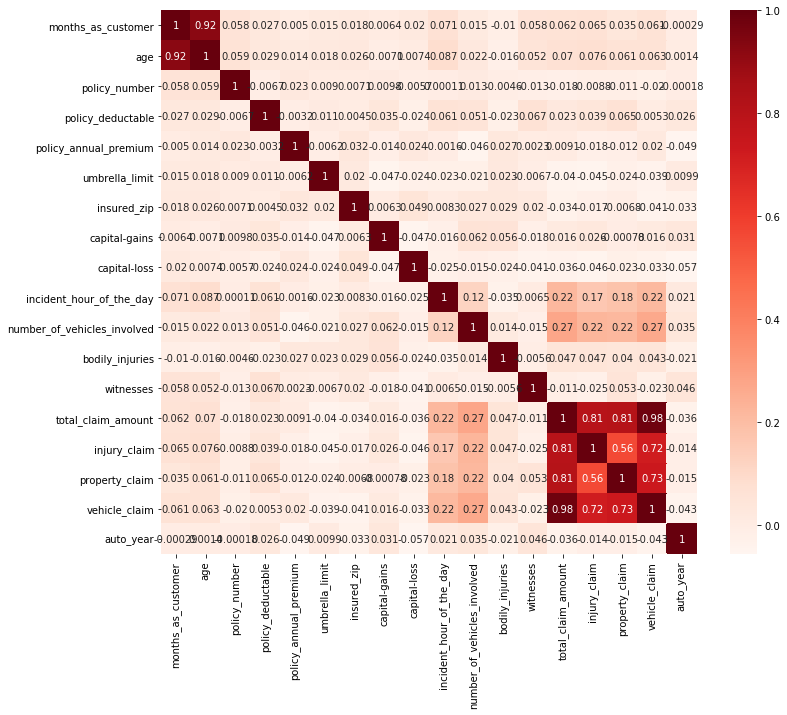

In [4]:
# Find correlations
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Analysis
from the heatmap we can see the correlation among the **total_claim_amount**, **injury_claim**,**property_claim**,**vehicle_claim**. This is indeed the case, as the total claim amount is the sum of rest of claims

N    753
Y    247
Name: fraud_reported, dtype: int64
0.247


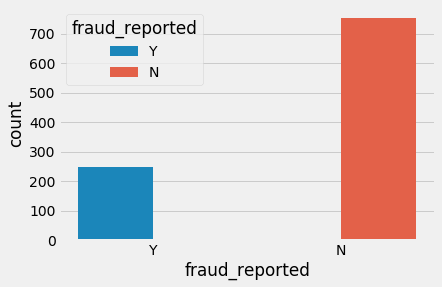

In [5]:
### count of fraud
plt.style.use('fivethirtyeight')
ax= sns.countplot(x='fraud_reported',data=data,hue='fraud_reported')
print(data['fraud_reported'].value_counts())
print(data[data['fraud_reported']=='Y']['fraud_reported'].count()/1000)

### Analysis:

24.7% of claims are fradulent.

In [6]:
### policy state
data['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

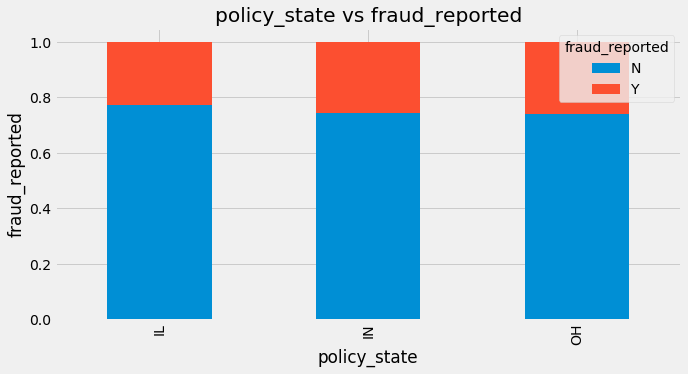

In [7]:
### policy_state
plt.rcParams['figure.figsize']=[10,5]
table = pd.crosstab(data['policy_state'],data['fraud_reported'])
table.div(table.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('policy_state vs fraud_reported')
plt.ylabel('fraud_reported')
plt.xlabel('policy_state')
plt.show()

In [8]:
### incident_state
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

fraud_reported    N   Y
incident_state         
NC               76  34
NY              204  58
OH               13  10
PA               22   8
SC              175  73
VA               85  25
WV              178  39


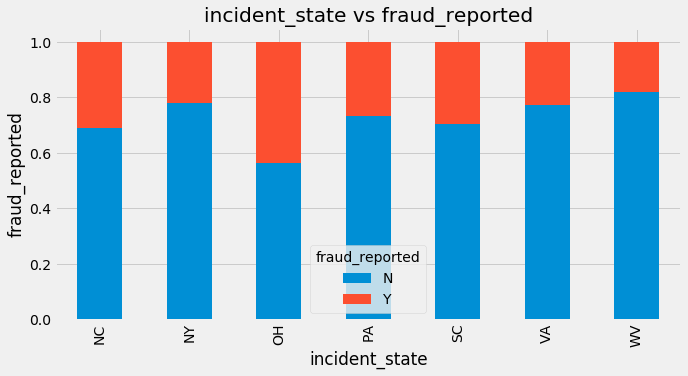

In [9]:
### incident_State 
plt.rcParams['figure.figsize']=[10,5]
table = pd.crosstab(data['incident_state'],data['fraud_reported'])
print(table)
table.div(table.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('incident_state vs fraud_reported')
plt.ylabel('fraud_reported')
plt.xlabel('incident_state')
plt.show()

### Analysis:
There is not much of relationship between the policy_State and the fraud_Reported, however there is a clear trend between the incident_State and fraud_reported, should keep incident_state for training

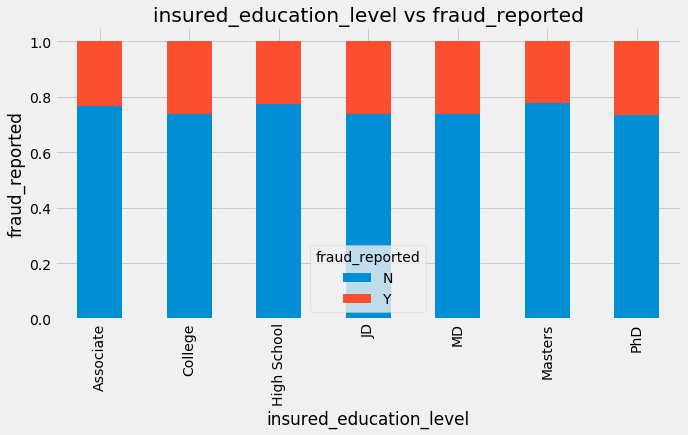

In [10]:
### education_level
plt.rcParams['figure.figsize']=[10,5]
table = pd.crosstab(data['insured_education_level'],data['fraud_reported'])
table.div(table.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('insured_education_level vs fraud_reported')
plt.ylabel('fraud_reported')
plt.xlabel('insured_education_level')
plt.show()

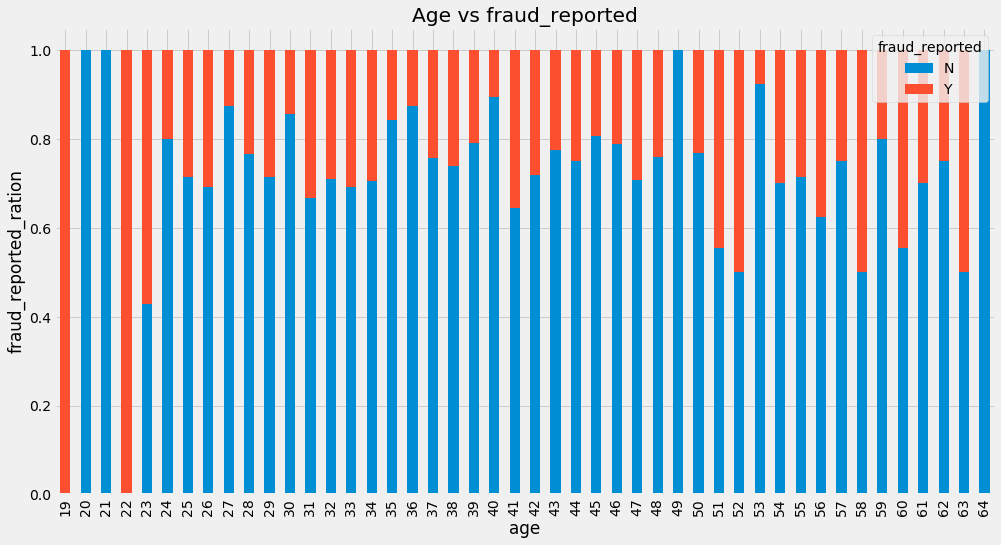

In [11]:
### age 
plt.rcParams['figure.figsize']=[15,8]
table = pd.crosstab(data['age'],data['fraud_reported'])
table.div(table.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('Age vs fraud_reported')
plt.ylabel('fraud_reported_ration')
plt.xlabel('age')
plt.show()

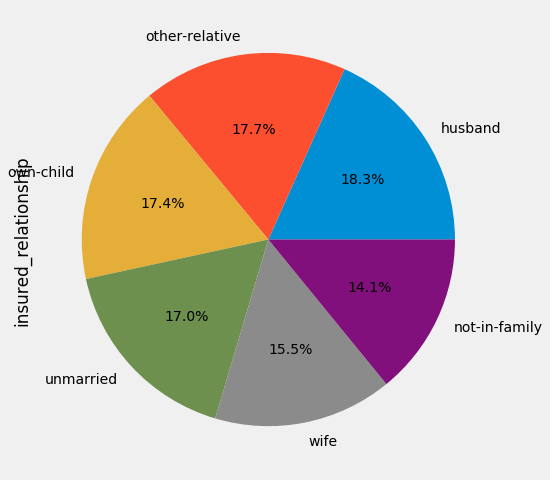

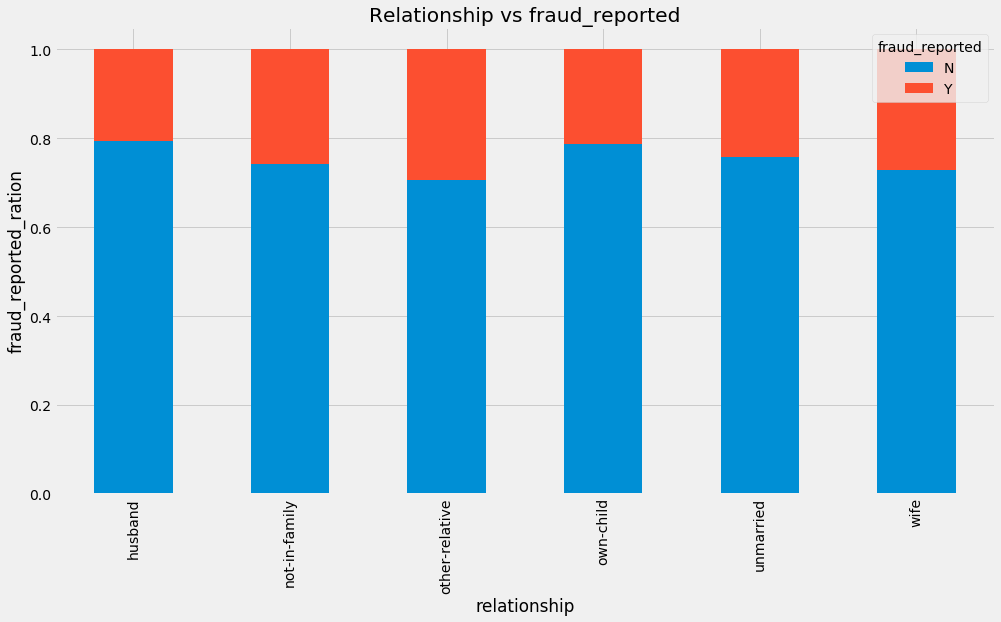

In [12]:
### relationship 
relationship_list = list(data['insured_relationship'].unique())
relationship = (data['insured_relationship'].value_counts()*100/len(data)).plot.pie(autopct="%.1f%%",labels=relationship_list )

table = pd.crosstab(data['insured_relationship'],data['fraud_reported'])
table.div(table.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('Relationship vs fraud_reported')
plt.ylabel('fraud_reported_ration')
plt.xlabel('relationship')
plt.show()
          

Text(0.5, 0, 'hobby')

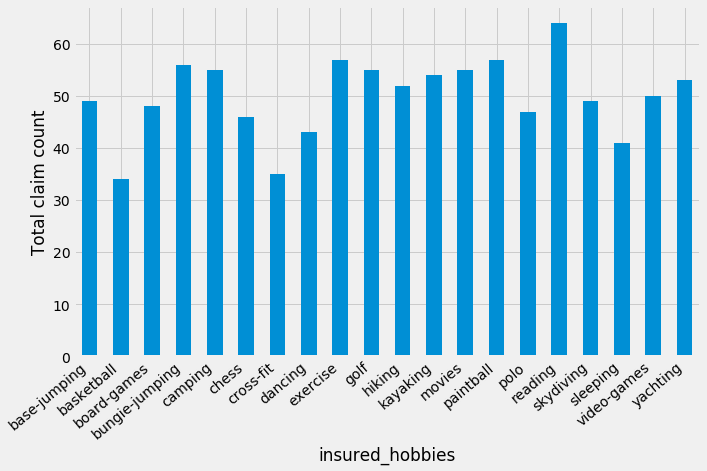

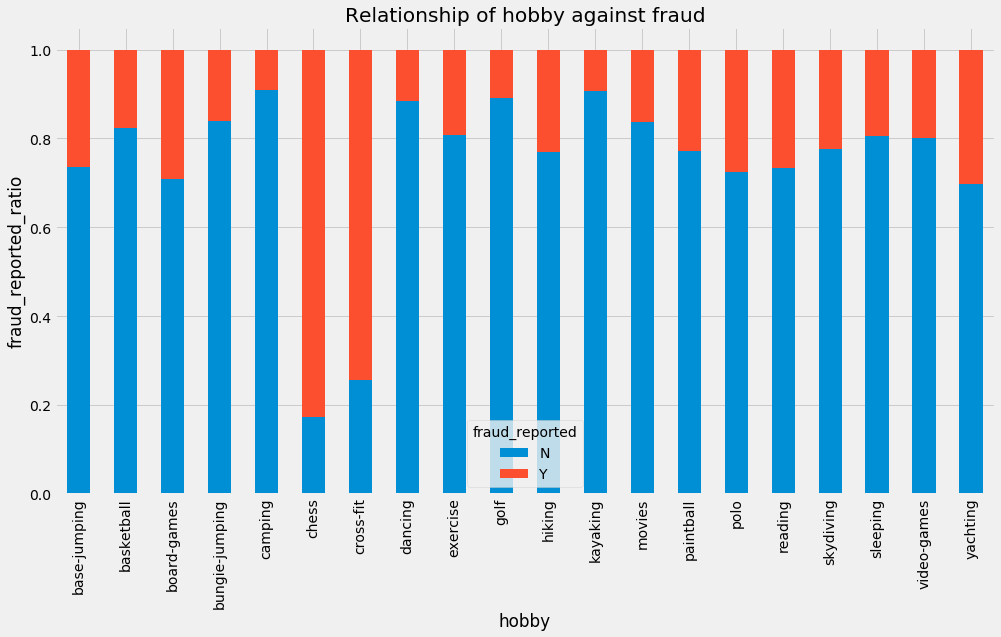

In [13]:
fig = plt.figure(figsize=(10,6))
hobby = data.groupby('insured_hobbies')['total_claim_amount'].count().plot.bar()
hobby.set_ylabel('Total claim count')
hobby.set_xticklabels(hobby.get_xticklabels(),rotation=40,ha='right')
# plt.show()
table = pd.crosstab(data['insured_hobbies'],data['fraud_reported'])
table.div(table.sum(1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('Relationship of hobby against fraud')
plt.ylabel('fraud_reported_ratio')
plt.xlabel('hobby')
# plt.show()

### Analysis

The above cells explore the relationship between fraud_Report and (**age,education,relationship,hobby**), there are some trends among them

_____________________
## Data Cleaning and Feature Engineering

In [14]:
### convert prediction target to 1/0
data['fraud_reported'].replace(to_replace='Y',value=1,inplace=True)
data['fraud_reported'].replace(to_replace='N',value=0,inplace=True)

In [15]:
data.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,NaN
top,NaN,NaN,NaN,1992-08-05,OH,250/500,NaN,NaN,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,Saab,RAM,NaN,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,0.431483
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,0.000000


In [16]:


### check out the categorical values: police_report_available, policy_csl
data.select_dtypes(include=['object']).columns


Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

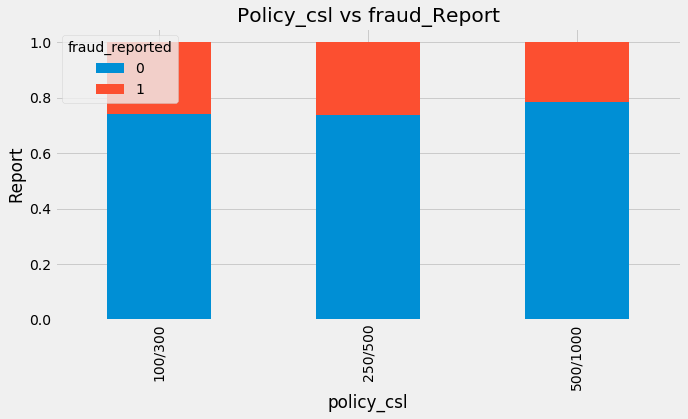

In [17]:
### combined single limit 
plt.rcParams['figure.figsize']=[10,5]
policy_csl = pd.crosstab(data['policy_csl'],data['fraud_reported'])
policy_csl.div(policy_csl.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Policy_csl vs fraud_Report')
plt.ylabel('Report')
plt.xlabel('policy_csl')
plt.show()

In [18]:
### cpolicy_csl is a concatenated value, delimited by /, need to split the into two separate features
data['csl_per_person']=data['policy_csl'].str.split('/',expand=True)[0]
data['csl_per_accident']=data['policy_csl'].str.split('/',expand=True)[1]

In [19]:
### extract the vehicle age from auto_year
data['vehicle_age']=2020 - data["auto_year"]
data['vehicle_age'].head()

0    16
1    13
2    13
3     6
4    11
Name: vehicle_age, dtype: int64

In [20]:
### incident_hour_of_the_day is numbers, good to cuts them into different period of a day for better analysis
data['incident_hour_of_the_day']

0       5
1       8
2       7
3       5
4      20
       ..
995    20
996    23
997     4
998     2
999     6
Name: incident_hour_of_the_day, Length: 1000, dtype: int64

In [21]:
bins =[-1,3,6,9,12,17,20,24]
names = ['pass-midnight','early-morning','morning','fore-noon','afternoon','evening','night']
data['incident_period_of_day']=pd.cut(data['incident_hour_of_the_day'],bins,labels=names).astype(object)
data[['incident_period_of_day','incident_hour_of_the_day']].head(10)

,incident_period_of_day,incident_hour_of_the_day
0,early-morning,5
1,morning,8
2,morning,7
3,early-morning,5
4,evening,20
5,evening,19
6,pass-midnight,0
7,night,23
8,night,21
9,afternoon,14


In [22]:
### checking categorial data
data.select_dtypes(include=object).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'csl_per_person', 'csl_per_accident', 'incident_period_of_day'],
      dtype='object')

In [23]:
### drop some columns that are not relevant to this task

data = data.drop(columns=['policy_number','policy_csl','insured_zip','policy_bind_date','incident_date','incident_location','auto_year',"incident_hour_of_the_day"])

In [24]:
### identify variables with '?' for missing values

unknown ={}
for i in list(data.columns):
    if data[i].dtype==object:
        j = np.sum(data[i]=="?")
        unknown[i]=j

### use dataframe to view the result
unknowns = pd.DataFrame.from_dict(unknown,orient='index')
unknowns

,0
policy_state,0
insured_sex,0
insured_education_level,0
insured_occupation,0
insured_hobbies,0
insured_relationship,0
incident_type,0
collision_type,178
incident_severity,0
authorities_contacted,0


### Analysis
Need to deal with **property_damage** and **police_report_available** for missing value handle

In [25]:
data["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [26]:
data["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [27]:
data['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [28]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'csl_per_person', 'csl_per_accident',
       'vehicle_age', 'incident_period_of_day'],
      dtype='object')

In [29]:
### first take out the useful features out first, convert categorial ones to dummy_variables
dummies = pd.get_dummies(data[['policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship',"incident_type",'incident_severity','authorities_contacted','incident_state','incident_city','auto_make','auto_model','csl_per_person','csl_per_accident','incident_period_of_day']])

In [30]:
dummies =dummies.join(data[['collision_type','property_damage','police_report_available','fraud_reported']])

In [31]:
dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_period_of_day_early-morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_pass-midnight,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,?,?,?,1
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,Rear Collision,NO,NO,0
3,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,Front Collision,?,NO,1
4,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,?,NO,NO,0


In [32]:
dummies.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD',
       ...
       'incident_period_of_day_early-morning',
       'incident_period_of_day_evening', 'incident_period_of_day_fore-noon',
       'incident_period_of_day_morning', 'incident_period_of_day_night',
       'incident_period_of_day_pass-midnight', 'collision_type',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object', length=149)

In [33]:
### split the target and features
x = dummies.iloc[:,0:-1]
y=dummies.iloc[:,-1]

In [35]:
### label encoding  [for this part I do not agree with the original code], instead of label encoding, i think that get_dummy is better
from sklearn.preprocessing import LabelEncoder
x['collision_en']=LabelEncoder().fit_transform(dummies['collision_type'])
x[['collision_en','collision_type']]

,collision_en,collision_type
0,3,Side Collision
1,0,?
2,2,Rear Collision
3,1,Front Collision
4,0,?
...,...,...
995,1,Front Collision
996,2,Rear Collision
997,3,Side Collision
998,2,Rear Collision


In [36]:
x.drop(columns=['collision_en'],inplace=True)

In [37]:
collision_type = pd.get_dummies(x['collision_type'],prefix='collision_type')
x=x.join(collision_type)

In [38]:
x.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_pass-midnight,collision_type,property_damage,police_report_available,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,Side Collision,YES,YES,0,0,0,1
1,0,1,0,0,1,0,0,0,0,1,...,1,0,0,?,?,?,1,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,1,0,0,Rear Collision,NO,NO,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,Front Collision,?,NO,0,1,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,?,NO,NO,1,0,0,0


In [39]:
x['property_damage'].replace(to_replace='YES',value=1,inplace=True)
x['property_damage'].replace(to_replace='NO',value=0,inplace=True)
x['property_damage'].replace(to_replace='?',value=0,inplace=True)
x['police_report_available'].replace(to_replace='YES',value=1,inplace=True)
x['police_report_available'].replace(to_replace='NO',value=0,inplace=True)
x['police_report_available'].replace(to_replace='?',value=0,inplace=True)

x=x.drop(columns=['collision_type'])

In [40]:
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD',
       ...
       'incident_period_of_day_fore-noon', 'incident_period_of_day_morning',
       'incident_period_of_day_night', 'incident_period_of_day_pass-midnight',
       'property_damage', 'police_report_available', 'collision_type_?',
       'collision_type_Front Collision', 'collision_type_Rear Collision',
       'collision_type_Side Collision'],
      dtype='object', length=151)

_______________________
## Model Selection

In [41]:
#### use LDA model on the dataset using K-fold CV 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5,random_state=7)
result = cross_val_score(model,x,y, cv=kfold,scoring='accuracy')
print(f'accuracy{result.mean():.2f}+/-{result.std()*2:.2f}')

/Users/nanyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


accuracy0.85+/-0.06


In [42]:
### testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=7)

In [42]:
### random forest tree
from sklearn.ensemble import RandomForestClassifier

rfc  = RandomForestClassifier(n_estimators=200)
kfold = KFold(n_splits=5,random_state=7)
result2 = cross_val_score(rfc,x_train,y_train, cv=kfold,scoring='accuracy')
print(result2.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7899999999999999


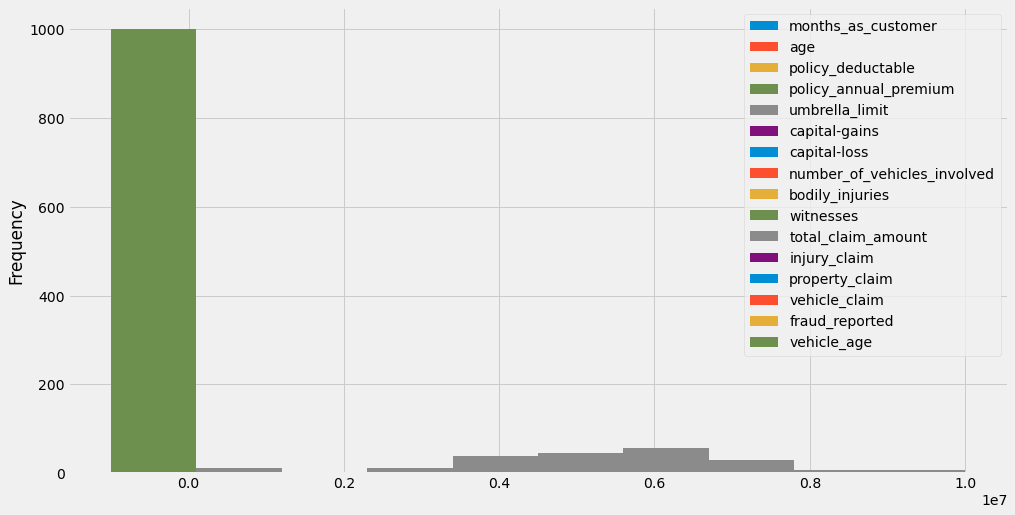

In [43]:
### generate a histogram plot for anomaly detection (this part not so sure from original code!)

### perhaps this one is to see the scale of different features are different, which requires normalization
plt.rcParams['figure.figsize']=[15,8]
data.plot(kind='hist')
plt.show()

### check for green features

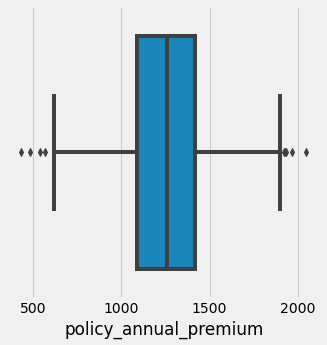

In [44]:
### check on policy_annual- premium
plt.rcParams['figure.figsize']=[5,5]
sns.boxplot(x=data['policy_annual_premium'])
plt.show()

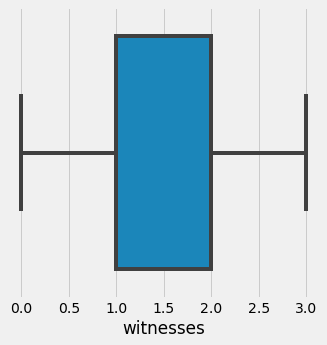

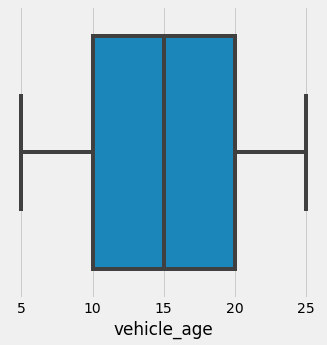

In [45]:
### check on vehicle age and witness

sns.boxplot(x=data['witnesses'])
plt.show()
sns.boxplot(x=data['vehicle_age'])

### Analysis
**policy_annual_premium** has outlier above Q1 and Q3 quadrilles and data-set is highly imbalanced.

________________________
## Data Normalization

In [45]:
### scalar standardization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled.shape

### As we all aware that scalar transformation transform data-frame to array format. 
### So, we have retained the data-frame with column name for future analysis.

(800, 151)

In [46]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x.columns)

In [47]:
### training on different models for selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV

xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs',max_iter=5000,  cv=10) 
knn = KNeighborsClassifier()
svcl = SVC(gamma='auto')
adb = AdaBoostClassifier(n_estimators=200)
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=200)
lda = LinearDiscriminantAnalysis()



In [49]:
models =[]
names = ['xgb','logreg','knn','svc','adb','dt','rf','lda']
models_=[xgb,logreg,knn,svcl,adb,dt,rf,lda]

models =list(zip(names,models_))

In [50]:
results=[]
names =[]
scoring = 'accuracy'

for name,model in models:
    kfold = KFold(n_splits=10)
    cv_res = cross_val_score(model,x_train_scaled,y_train,cv=kfold,scoring=scoring)
    results.append(cv_res)
    names.append(name)
    print(f'mean:{cv_res.mean():.2f},std:{cv_res.std():.2f}')
    

mean:0.83,std:0.03
mean:0.83,std:0.03
mean:0.72,std:0.06
mean:0.79,std:0.04
mean:0.81,std:0.04
mean:0.84,std:0.03
mean:0.80,std:0.04
mean:0.84,std:0.03


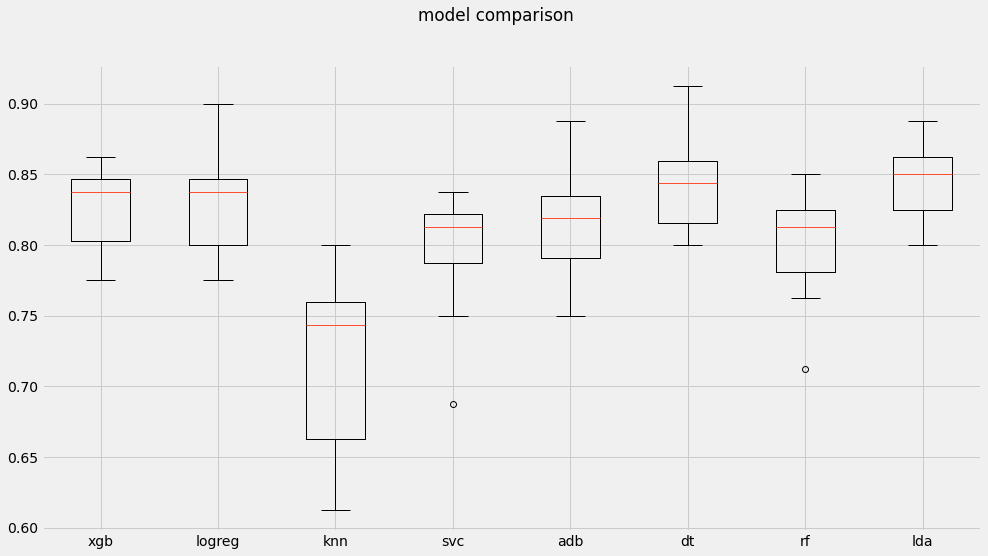

In [51]:
plt.rcParams['figure.figsize']=[15,8]
fig= plt.figure()
fig.suptitle('model comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Analysis
Based on the accuracy results, we should focus on XGB,LogisticRegression, LDA for further comparison

In [52]:
### voting classification
from sklearn.ensemble import VotingClassifier
clf=[('LR', logreg), ('XGB', xgb),('LDA',lda)]
eclf = VotingClassifier(estimators =clf,voting='soft')

for clf,label in zip([logreg,xgb,lda,eclf],["LR",'XGB','LDA','ENSEMBLE']):
    score = cross_val_score(clf,x_train_scaled,y_train,cv=10,scoring=scoring)
    print(f'mean:{score.mean():.2f},std:{score.std():.2f},{label}')

mean:0.83,std:0.04,LR
mean:0.82,std:0.03,XGB
mean:0.84,std:0.03,LDA
mean:0.83,std:0.03,ENSEMBLE


### Analysis

Based on the results above, LDA seems to outperform the voting classifier marginally, meanwhile we should still look into LR,XGB as well for further selection

_____________________
### Back to Feature Investigation 

In [48]:


# fit model on all training data 
xgb = XGBClassifier() 
xgb.fit(x_train_scaled, y_train)
# make predictions for test data and evaluate 
xgb_pred = xgb.predict(x_test_scaled)
print(xgb_pred)
predictions = [round(value) for value in xgb_pred] 
accuracy = np.sum(y_test==xgb_pred)/len(xgb_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold 
thresholds =np.sort(xgb.feature_importances_)
# thresholds=list(set(thresholds))

[0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1]
Accuracy: 81.00%


In [ ]:
x_train_scaled.shape

In [50]:
### Get the set of features for optimum results

from sklearn.feature_selection import SelectFromModel
for thresh in thresholds:
    
    selection = SelectFromModel(xgb,threshold=thresh,prefit=True)
    select_x_train = selection.transform(x_train_scaled)
    ### train model
    model = XGBClassifier()
    model.fit(select_x_train,y_train)
    select_x_test = selection.transform(x_test_scaled)
    xgb_pred = model.predict(select_x_test)
    accuracy = np.sum(xgb_pred==y_test)/len(xgb_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_x_train.shape[1], accuracy*100.0))

Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000, n=151, Accuracy: 81.00%
Thresh=0.000

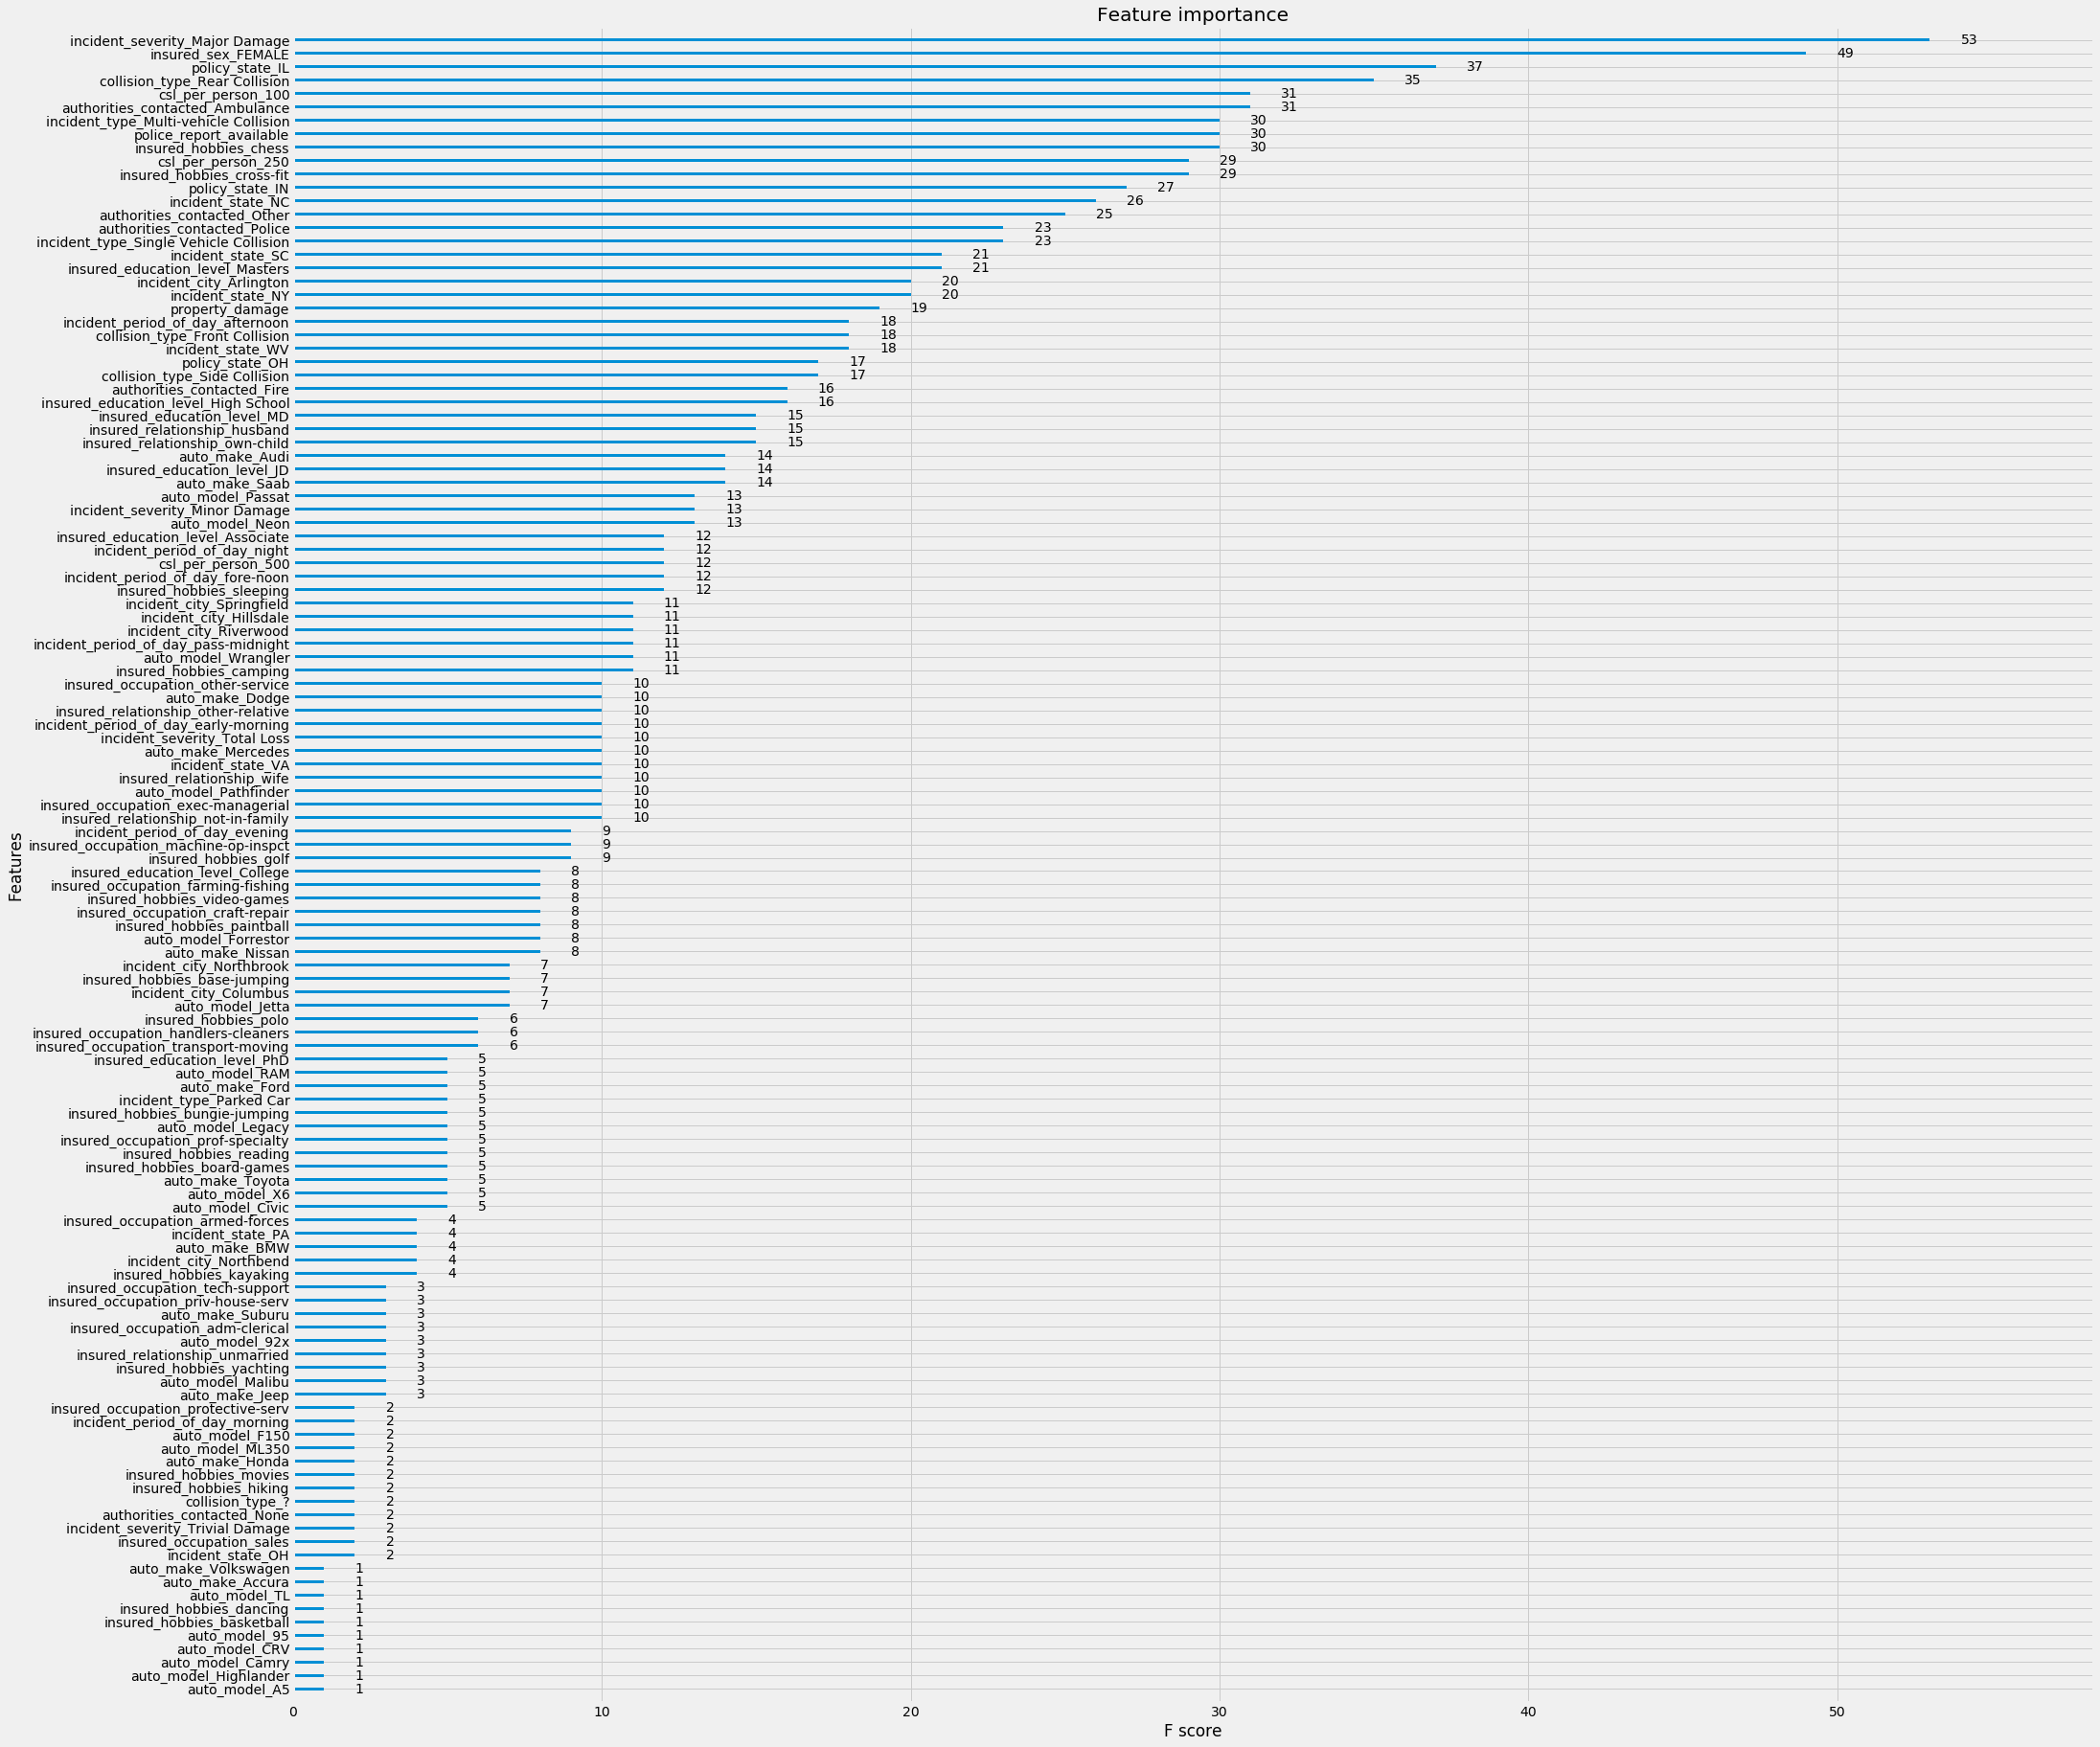

In [51]:
### Checking for important features
from xgboost import plot_importance

xgbo =  XGBClassifier()
xgbo.fit(x_train_scaled,y_train)
plt.rcParams['figure.figsize'] = [30, 30]
plot_importance(xgbo)

In [75]:
#### building random hyperparameter search based on xgboost

xgb = XGBClassifier(objective='binary:logistic',random_state=7,n_jobs=-1)

xgb.fit(x_train_scaled,y_train)

scores= cross_val_score(xgb,x_train_scaled,y_train,cv=kfold,scoring='brier_score_loss')
#Brier score measures the mean squared difference between 
#(1) the predicted probability assigned to the possible outcomes for item i and
#(2) the actual outcome. 
print(f'Brier loss:{np.mean(scores)*-1:.5f}')

Brier loss:0.13957


In [ ]:
print(xgb.get_params())

In [53]:
### create parameter grid for XGB
from sklearn.model_selection import RandomizedSearchCV
params ={
    'learning_rate':[0.0001,0.001,0.01,0.1,0.2,0.3],
    'n_estimators':[int(x) for x in np.linspace(start=100,stop=500,num=9)],
    'min_child_weight':[i for i in range(1,7)],
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree': [i/10.0 for i in range(6,11)]
}

### create randomized grid search model
rgs = RandomizedSearchCV(estimator=xgb,param_distributions=params,n_iter=200,cv=kfold,random_state=7,n_jobs=-1,scoring="brier_score_loss",return_train_score=True)

In [54]:
rgs.fit(x_train_scaled,y_train)
print(rgs)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=n...
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                       

In [55]:
### show the best param for XGB
import sklearn.metrics as skl
print(rgs.best_params_)
rgs_pred=rgs.predict(x_test_scaled)
print(f'accuracy{skl.accuracy_score(y_test,rgs_pred)*100}')
print(f'cohen kappa:{skl.cohen_kappa_score(y_test,rgs_pred)}')
print(f'recall:{skl.recall_score(y_test,rgs_pred)*100}')
print(skl.classification_report(y_test,rgs_pred))

{'subsample': 0.7, 'n_estimators': 350, 'min_child_weight': 2, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
accuracy80.5
cohen kappa:0.526469159786304
recall:74.50980392156863
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       149
           1       0.59      0.75      0.66        51

    accuracy                           0.81       200
   macro avg       0.75      0.79      0.76       200
weighted avg       0.83      0.81      0.81       200



In [56]:
### validating fitted model accuracy for logisticregrssionCV
logreg = LogisticRegressionCV(solver='lbfgs',max_iter=5000,  cv=10) 
logreg.fit(x_train_scaled,y_train)

y_pred = logreg.predict(x_test_scaled)
predictions =  skl.accuracy_score(y_test,y_pred)
predictions

0.845

In [69]:
### validating fitted model with LDA:
lda.fit(x_train_scaled,y_train)
y_lda_pred = lda.predict(x_test_scaled)

In [70]:
from sklearn.metrics import f1_score

print(f'XGB_F1-SCORE: {f1_score(y_test, rgs_pred)}')
print(f'LR_F1-SCORE: {f1_score(y_test, y_pred)}')
print(f'LDA_F1-SCORE: {f1_score(y_test, y_lda_pred)}')

XGB_F1-SCORE: 0.6608695652173913
LR_F1-SCORE: 0.6990291262135924
LDA_F1-SCORE: 0.6846846846846847


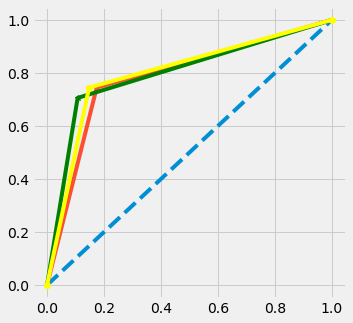

In [79]:
### ROC curve 
# calculate roc curve
fpr, tpr, thresholds = skl.roc_curve(y_test, rgs_pred)## for XGB
fpr2,tpr2,thresholds2 = skl.roc_curve(y_test,y_pred) ### for LR
fpr3,tpr3,thresholds3 = skl.roc_curve(y_test,y_lda_pred) ### for LDA
# plot no skill
plt.rcParams['figure.figsize']=[5,5]
plt.plot([0,1],[0,1],linestyle='--')

## plot the roc curve for the model
plt.plot(fpr,tpr,marker='.') ## XGB
plt.plot(fpr2,tpr2,marker='*',color='green') ## for LR
plt.plot(fpr3,tpr3,marker='o',color='yellow') ## FOR LDA

Confusion Matrix
[[133  16]
 [ 15  36]]


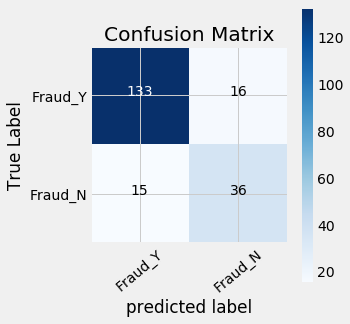

In [77]:
### evaluation of model - confusion matrix plot 
import itertools

def plot_confusion_matrix(cm,classes,title='Confusion Matrix',normalize=False,cmap=plt.cm.Blues):
    print('Confusion Matrix')
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=40)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment ='center',
                color ='white' if cm[i,j]>thresh else 'black')
    plt.ylabel('True Label')
    plt.xlabel('predicted label')
    plt.tight_layout()
    

cnf_matrix = skl.confusion_matrix(y_test,rgs_pred)
cnf_matrix2 = skl.confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

## plot confusion matrix 
plt.figure()
# plot_confusion_matrix(cnf_matrix,classes=['Fraud_Y','Fraud_N'])
plot_confusion_matrix(cnf_matrix2,classes=['Fraud_Y','Fraud_N'])

### Conclusion:

Based on the above models' performance, it is safe to conclude that Logistic Regression has greater ability to detect fradulent claims, followed by LDA and XGB models

Refer to the above matrix, 
accuracy of the model: (133+36)/(133+16+15+36)=0.845
false detection rate: 1-0.845 = 0.15


